### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
auto_data = pd.read_csv("audi.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [3]:
#auto_data_dum = pd.get_dummies(auto_data)

In [4]:
object_cols = auto_data.columns[auto_data.dtypes == 'object']
le = LabelEncoder()
for col in object_cols:
    auto_data[col] = le.fit_transform(auto_data[col])
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,2,2020,16999,1,4018,2,145,49.6,1.0
10664,2,2020,16999,1,1978,2,150,49.6,1.0
10665,2,2020,17199,1,609,2,150,49.6,1.0
10666,9,2017,19499,0,8646,2,150,47.9,1.4


In [5]:
X = auto_data.drop(['price'], axis=1)
Y = auto_data['price']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
3923,3,2016,1,48891,0,0,74.3,2.0
2745,11,2020,2,582,0,145,33.2,3.0
7184,2,2019,1,3346,0,145,51.4,1.6
4910,0,2019,1,3979,2,145,51.4,1.0
6793,0,2017,2,32523,2,145,56.5,1.4
...,...,...,...,...,...,...,...,...
9372,8,2018,0,7442,2,145,52.3,1.4
7291,2,2015,1,57841,2,30,57.6,1.4
1344,2,2019,1,5423,0,145,55.4,2.0
7293,25,2017,2,36397,2,150,42.8,2.0


In [7]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[-0.54832954, -0.50864112, -0.11396454, ..., -1.88095873,
         1.82427663,  0.11573486],
       [ 0.99112684,  1.33170933,  1.19926576, ...,  0.27244894,
        -1.34731756,  1.77540872],
       [-0.74076159,  0.87162172, -0.11396454, ...,  0.27244894,
         0.05713534, -0.54813469],
       ...,
       [-0.74076159,  0.87162172, -0.11396454, ...,  0.27244894,
         0.36580631,  0.11573486],
       [ 3.68517552, -0.04855351,  1.19926576, ...,  0.34670437,
        -0.60650724,  0.11573486],
       [-0.54832954, -0.50864112,  1.19926576, ..., -1.58393698,
         1.28410244,  0.11573486]])

<br><br>LINEAR REGRESSION

In [8]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_MSE = metrics.mean_squared_error(Y_test, simple_LR_predictions)

print (f'MSE = {round(simple_LR_MSE,3)}')

MSE = 27200096.35


In [9]:
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 5215.371


Text(0, 0.5, 'Target')

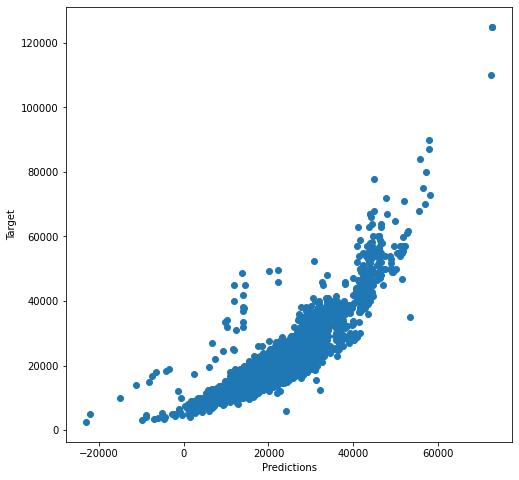

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [11]:
simple_LR.intercept_

22927.453729744077

In [12]:
pd.DataFrame(simple_LR.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,1380.643349
price,4685.844468
transmission,-129.141361
mileage,-2239.015798
fuelType,597.574476
tax,-1223.865100
mpg,-2028.518507
engineSize,6796.366525


<br><br>LASSO

In [13]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5215.21


Text(0, 0.5, 'Target')

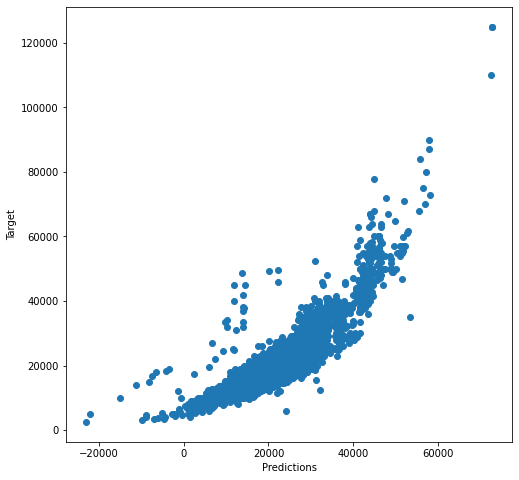

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

<br><br>LASSO CV

In [15]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5214.274


Text(0, 0.5, 'Target')

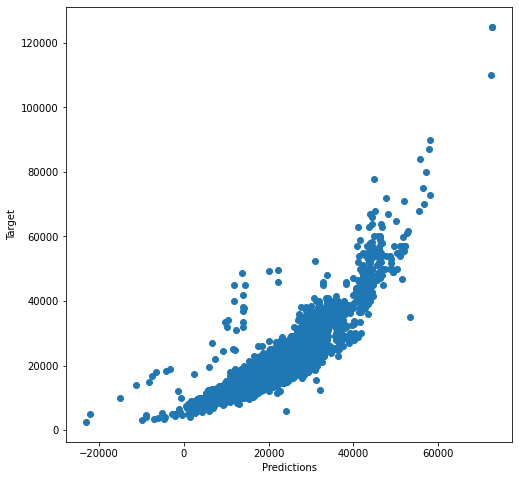

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

<br><br>RIDGE

In [17]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5215.231


Text(0, 0.5, 'Target')

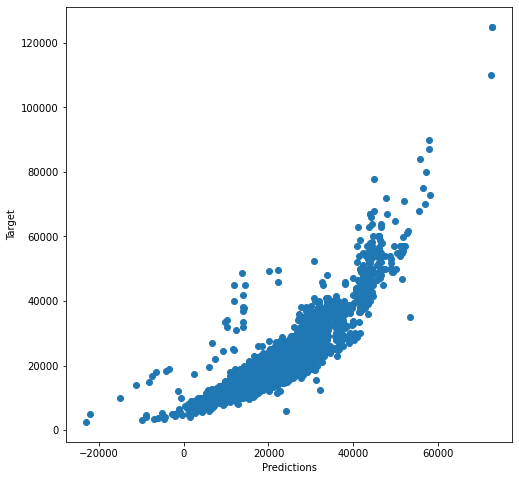

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

<br><br>RIDGE CV

In [19]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5213.988


Text(0, 0.5, 'Target')

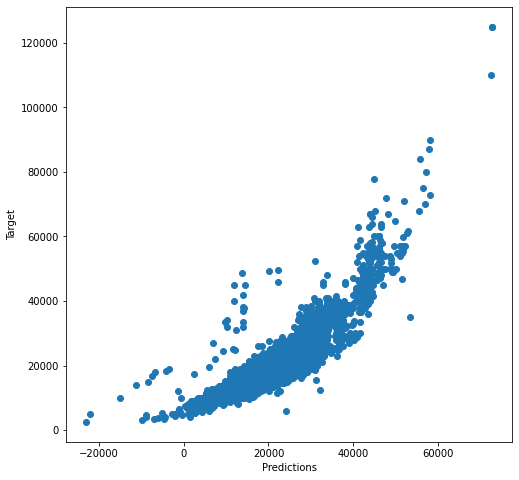

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

<br><br>LASSO CV ALPHAS

In [21]:
alphas = np.linspace(1, 10, 20)
model = LassoCV(random_state = 10, alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5214.331


Text(0, 0.5, 'Target')

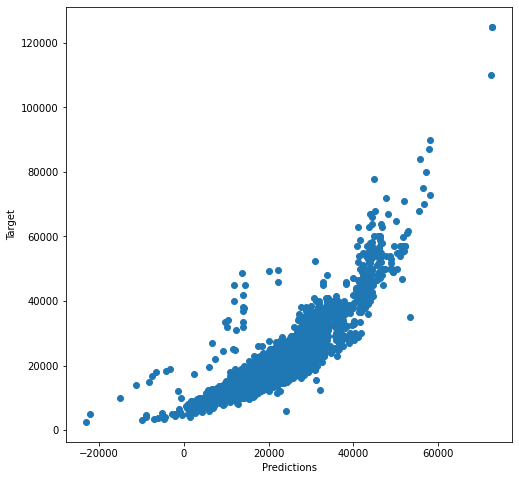

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

<br><br>RANDOM FOREST

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 2274.573


Text(0, 0.5, 'Target')

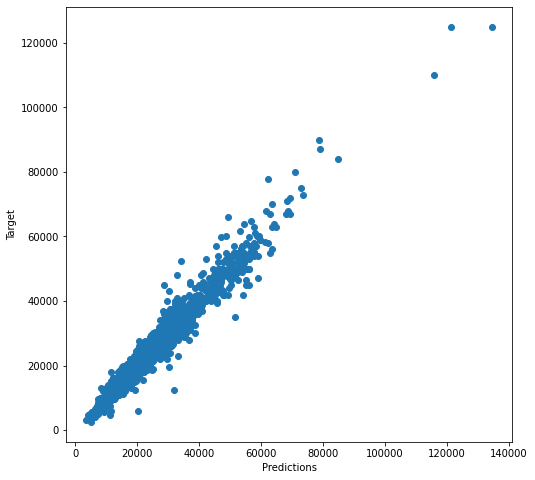

In [24]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')